In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("LivingPlanetIndex_2022_PublicData/LPD2022_public.csv", dtype='str', index_col=0, header=0)

In [4]:
data.head()

,Binomial,Replicate,Citation,Class,Order,Family,Genus,Species,Subspecies,Authority,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
ID,,,,,,,,,,,,,,,,,,,,,
1,Balearica_regulorum,1,"Pomeroy, D. and P. Mwima (2002). The State of ...",Aves,Gruiformes,Gruidae,Balearica,regulorum,NaN,"(Bennett, 1834)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acrocephalus_sechellensis,1,"Rands, M. (1989). ""Saving the Seychelles brush...",Aves,Passeriformes,Acrocephalidae,Acrocephalus,sechellensis,NaN,"(Oustalet, 1877)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Copsychus_sechellarum,1,"Komdeur, J. (1996). ""Breeding of the Seychelle...",Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,NaN,"Newton, 1865",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Copsychus_sechellarum,0,"Komdeur, J. (1996). ""Breeding of the Seychelle...",Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,NaN,"Newton, 1865",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Falco_punctatus,0,"Groombridge, J. J., Bruford, M.W., Jones, C.G,...",Aves,Falconiformes,Falconidae,Falco,punctatus,NaN,"Temminck, 1821",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data["Region"].value_counts()

Oceania                        9771
North America                  8277
Latin America and Caribbean    5191
Europe                         5099
Africa                         2085
Asia                           1848
Antarctic                       243
International Waters            166
Name: Region, dtype: int64

In [6]:
LAC = data[data["Region"]=="Latin America and Caribbean"]

In [7]:
# country_counts = LAC.Country.value_counts()
# selected_country_counts = country_counts[country_counts > 50]
# plt.figure(figsize=(20,10))
# selected_country_counts.plot.bar()
# plt.show()

In [8]:
plt.rcParams['axes.titlesize'] = '20'
plt.rcParams['axes.labelsize'] = '16'

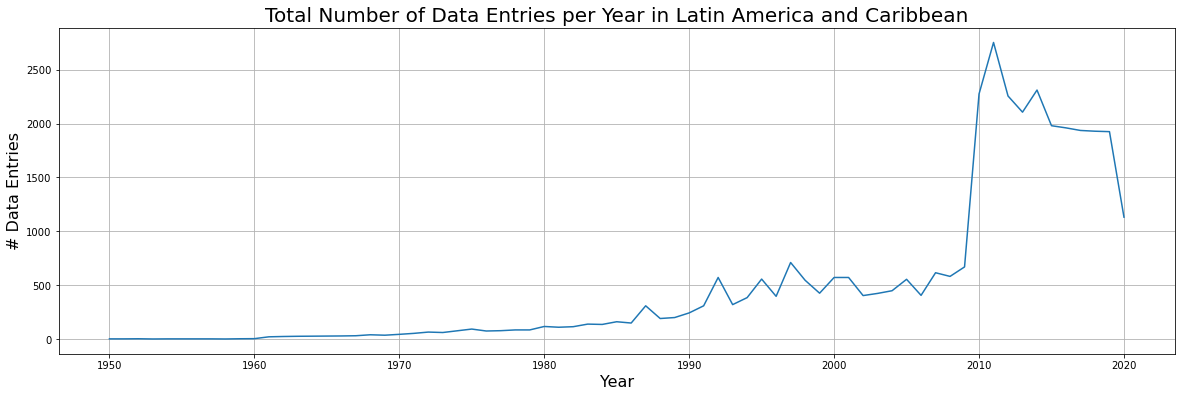

In [9]:
plt.figure(figsize=(20,6))
data_counts_per_year = LAC.loc[:, '1950':'2020'].notna().sum()
data_counts_per_year.plot()
plt.title('Total Number of Data Entries per Year in Latin America and Caribbean')
plt.xlabel('Year')
plt.ylabel('# Data Entries')
plt.xticks()
plt.grid()
plt.show()

In [46]:
def plot_fields(df, col_name, start_year, end_year, min_count=0):
    plt.figure(figsize=(20,10))
    for field in df[col_name].unique():
        sums = df[df[col_name]==field].loc[:, str(start_year):str(end_year)].notna().sum()
        if sums.sum() > min_count:
            sums.plot(label=field)
    plt.grid()
    plt.legend(loc='upper left', fontsize=14, title=col_name, title_fontsize=16)
    title = f"Amount of Data for each '{col_name}'"
    title += f"\n{f' (only showing fields with more than {min_count} total)' if min_count > 0 else ''}"
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Number of data entries")
    plt.show()

In [13]:
# For every column that isn't a year, this saves the amount of data entries for each field in the column as 
# a pivot table and adds the pivot tables to a dictionary. This takes a while to run and probably isn't a good way to 
# do it compared to the above method which just calculates the amount of entries for the specific column when it is 
# called. I was just experimenting with pandas.
years = [str(year) for year in range(1950, 2021)]
notna_dict = {}
for col in LAC.columns[:31]:
    notna_dict[col] = LAC.pivot_table(values=years, index=col, aggfunc=lambda x: x.notna().sum())

In [42]:
def plot_fields_2(col_name):
    notna_dict[col_name].T.plot(figsize=(20,10), title=f"Amount of Data for each '{col_name}'", 
                               xlabel='Year', ylabel='# Data Entries')
    plt.legend(loc='upper left', title=col_name)
    plt.grid()
    plt.show()

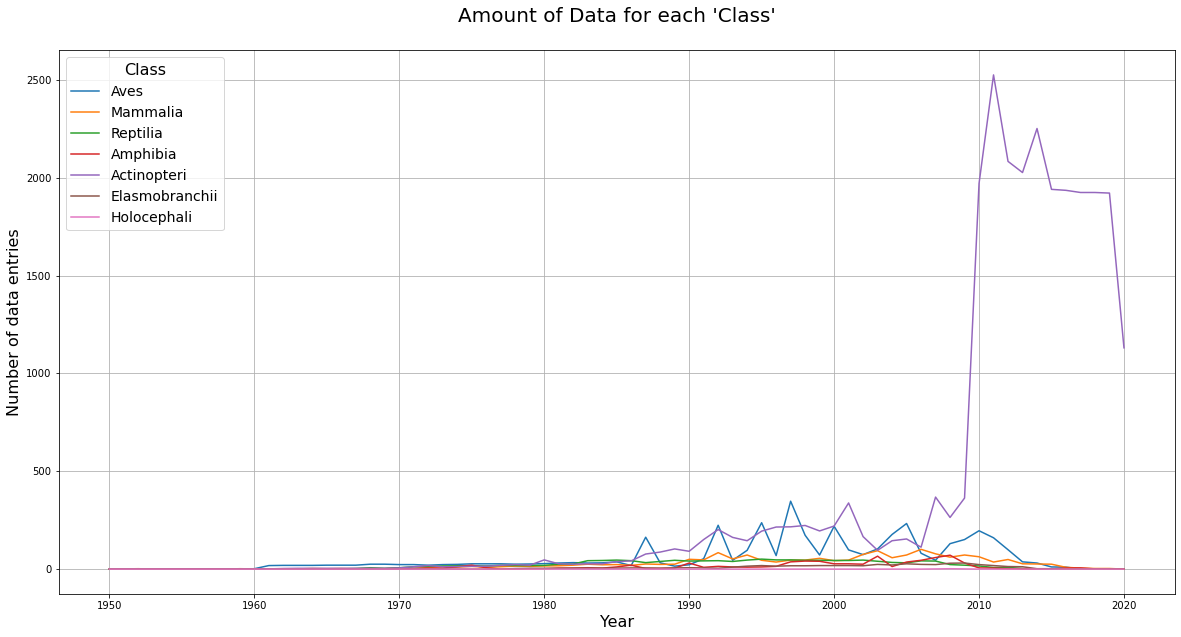

In [47]:
plot_fields(LAC, "Class", 1950, 2020)

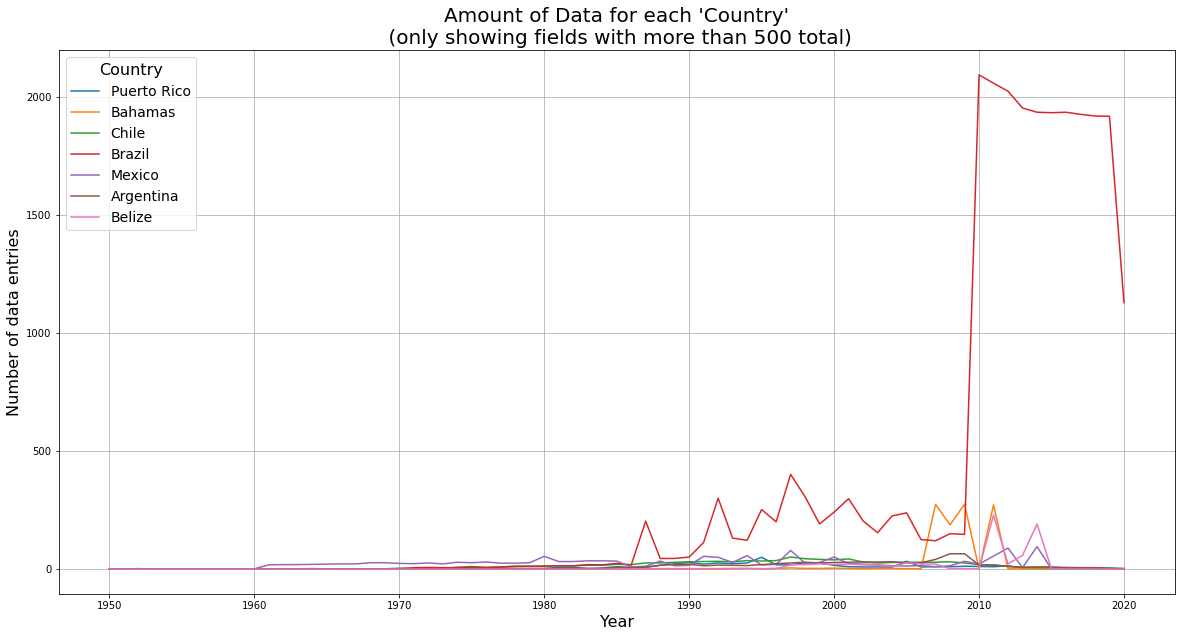

In [48]:
plot_fields(LAC, 'Country', 1950, 2020, 500)

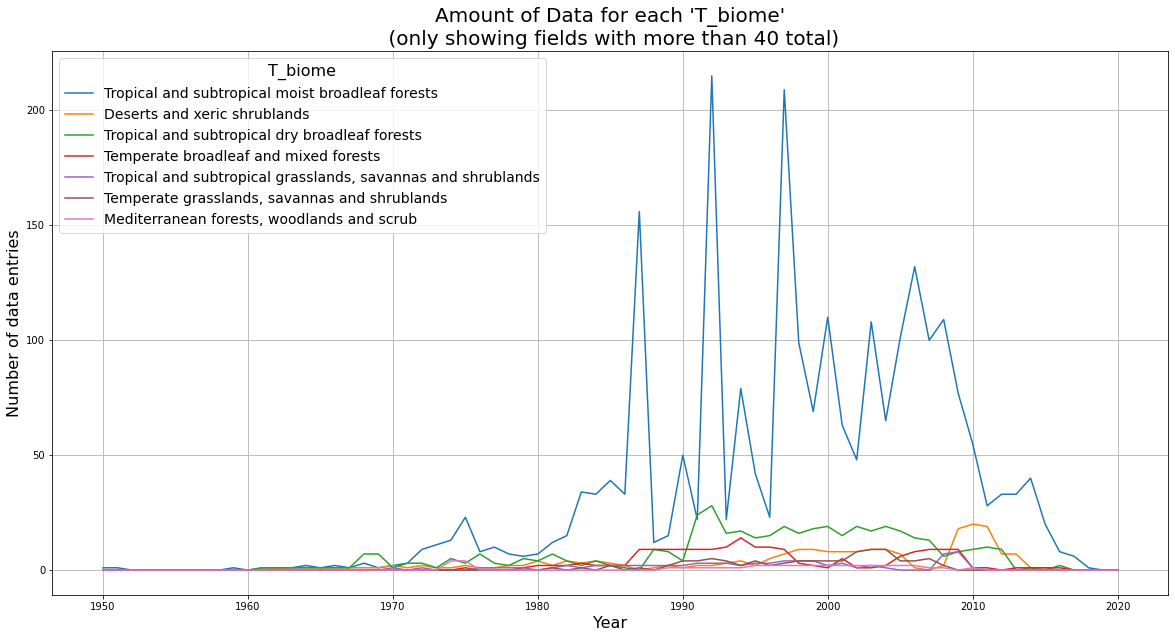

In [49]:
plot_fields(LAC, 'T_biome', 1950, 2020, 40)

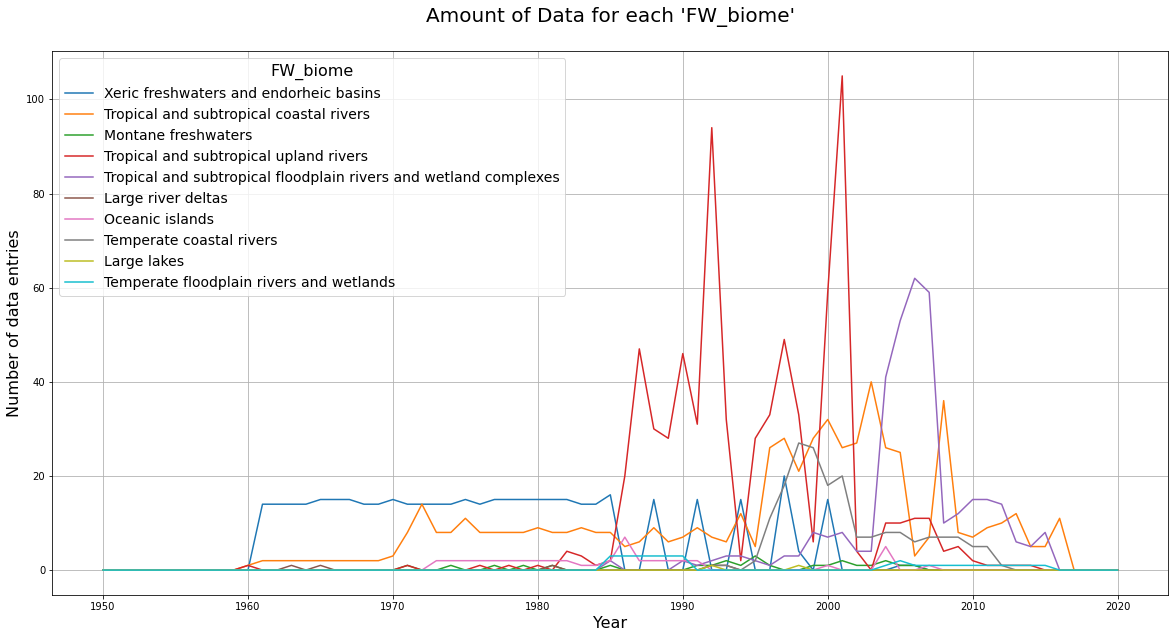

In [50]:
plot_fields(LAC, 'FW_biome', 1950, 2020)

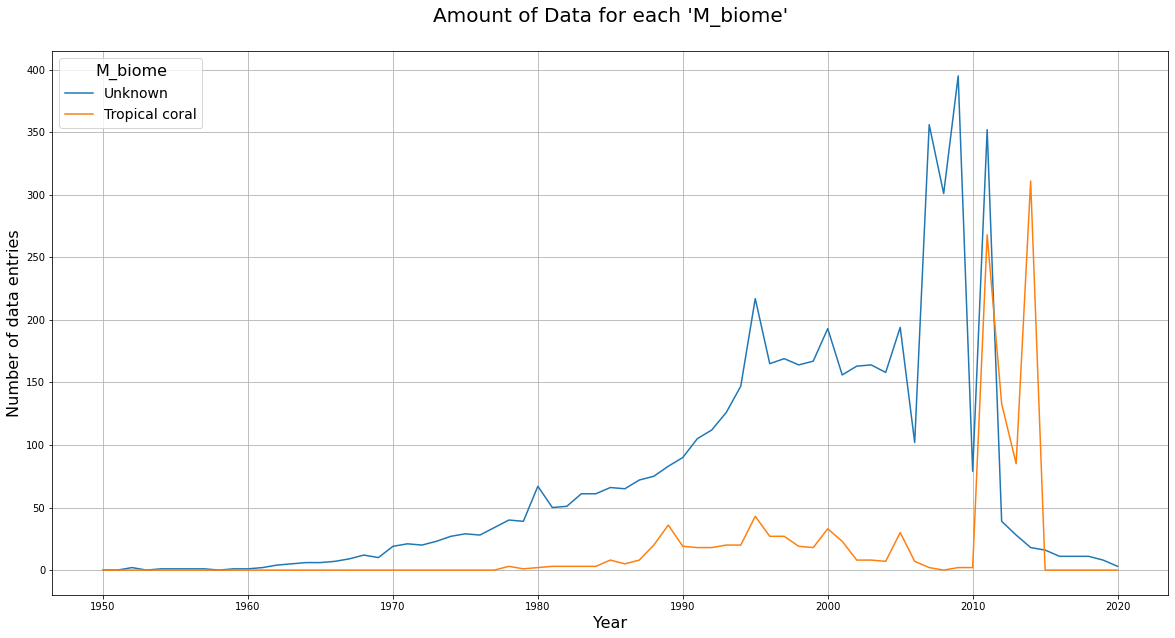

In [51]:
plot_fields(LAC, 'M_biome', 1950, 2020)

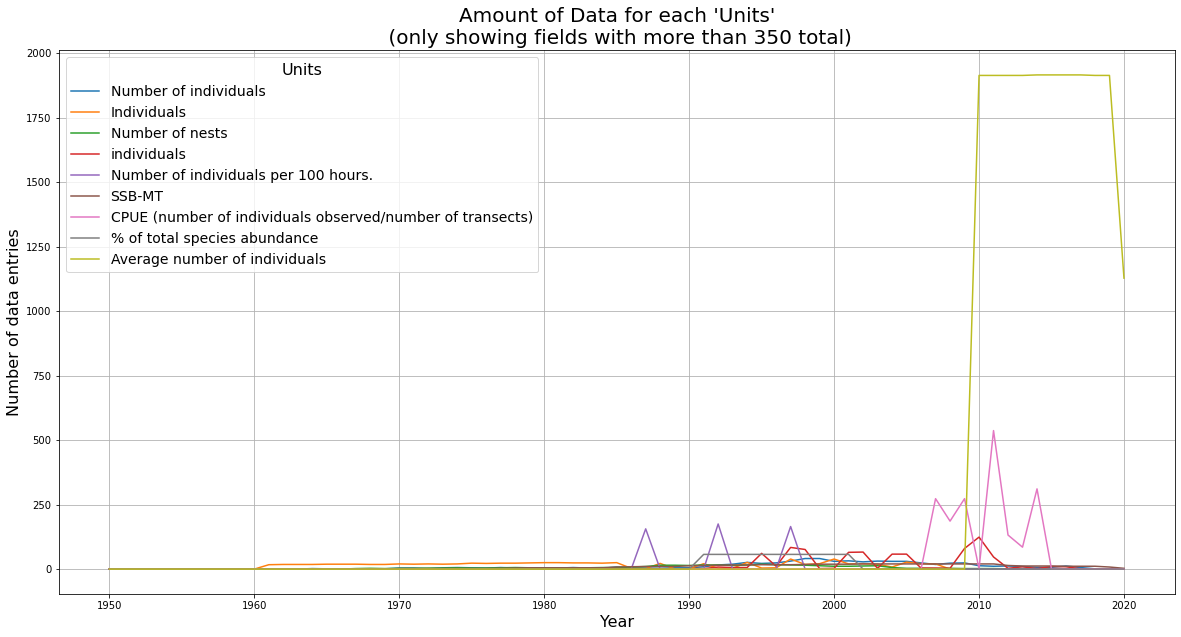

In [52]:
plot_fields(LAC, 'Units', 1950, 2020, 350)

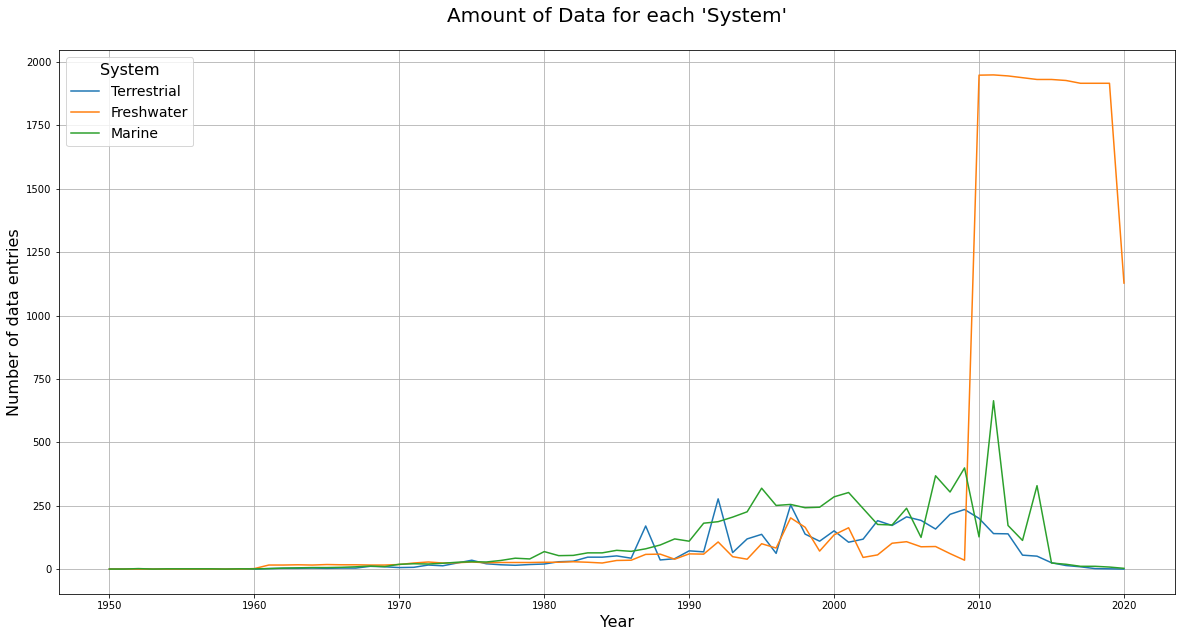

In [53]:
plot_fields(LAC, 'System', 1950, 2020, 0)

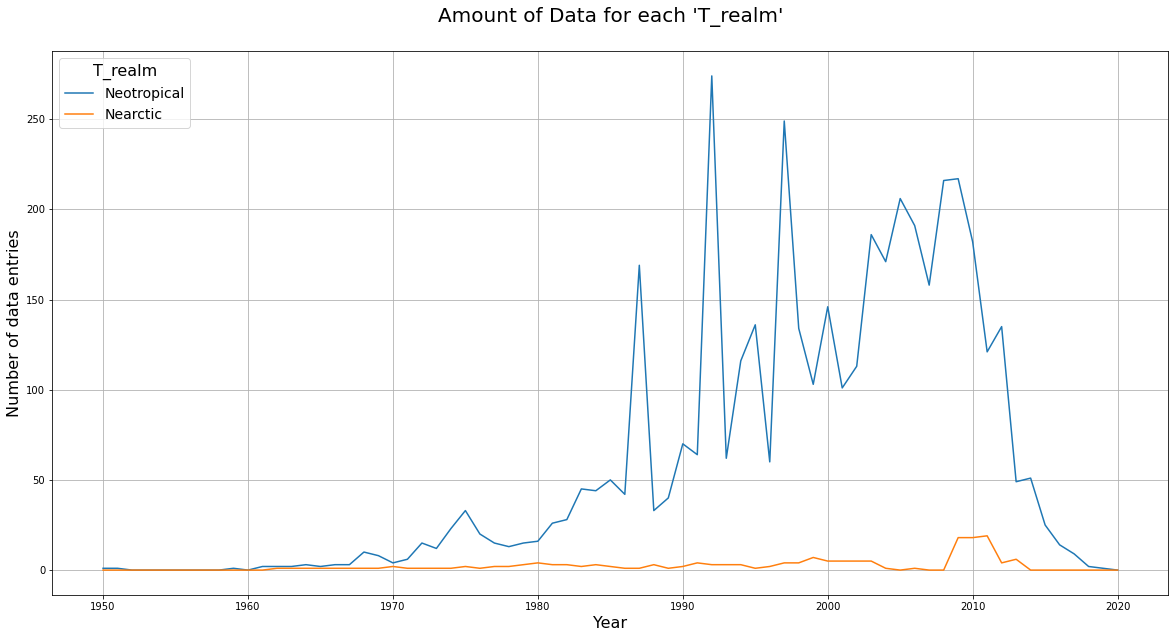

In [54]:
plot_fields(LAC, 'T_realm', 1950, 2020, 0)